In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [95]:
#url
ruta = r'C:\Users\Usuario\Documents\Estadistica\Dataisland1.xlsx'
ruta1 = r'C:\Users\Usuario\Documents\Estadistica\Isla2.xlsx'

In [96]:
data1= pd.read_excel(ruta)
data2 = pd.read_excel(ruta1)

In [97]:
dataisland1=pd.DataFrame(data1)
dataisland1=dataisland1.drop(["Prefijo","Dispensador","Forma de Pago","Ticket","Num. Factura","Fecha Ventas"],axis=1)
dataisland2=pd.DataFrame(data2)
dataisland2=dataisland2.drop(["Prefijo","Dispensador","Forma de Pago","Ticket","Num. Factura","Fecha Ventas"],axis=1)
datatotal=pd.concat([dataisland1,dataisland2],ignore_index=True)#reiniciar el indice

In [98]:
#con este metodo se eliminan datos de la base
#filtro=datatotal["Producto"]=="CORRIENTE"
#data=datatotal[filtro]
#datatotal = datatotal.reset_index(drop=True)

In [99]:
datatotal["Producto"].value_counts()

Producto
CORRIENTE    8857
DIESEL       2737
V-POWER      1210
Name: count, dtype: int64

#comprobacion y validacion de los flitro se procede a trabajar con los flitros
data={}
for i in range(len(datatotal)):
    if datatotal["Producto"][i]=="CORRIENTE":
        data[i]=datatotal["Producto"][i]
df=pd.DataFrame({
    "data":data
    }) 

In [100]:
def filtro1 (def_datatotal,def_Tipo):
    filtro = def_datatotal["Producto"] == def_Tipo
    datacorriente = def_datatotal[filtro]
    return datacorriente

In [101]:
Tipo1="V-POWER"
datacorriente=filtro1(datatotal,Tipo1)
#reseo en el indice para que no hallan icovenientes a la hora de las comparciones me paso abajo con sacar las frecuencias al buscar por el nombre de la coluna y si poscion
datacorriente.reset_index(drop=True, inplace=True)


In [102]:
datacorriente

,Producto,Galones,Valor Venta
0,V-POWER,11201.0,111002.0
1,V-POWER,16146.0,160007.0
2,V-POWER,8073.0,80003.0
3,V-POWER,7064.0,70000.0
4,V-POWER,14674.0,145419.0
...,...,...,...
1205,V-POWER,9889.0,98000.0
1206,V-POWER,8073.0,80003.0
1207,V-POWER,8275.0,82005.0
1208,V-POWER,8073.0,80004.0


In [103]:
#Maximo y Minimos 
Xmax=datacorriente["Galones"].max()
Xmin=datacorriente["Galones"].min()
#Rango
Rango=Xmax-Xmin
#numero de datos
n=len(datacorriente)



In [104]:
import math
#Numero de intervalos Stuarges re dondeo por defecto
m=int(1+3.3*math.log(n))#redondeo por defecto ejemplo 1,5=1
#Longitud del intervalo
C=round(Rango/m,0)#redondeo por exceso ejemplo 1,5=2

In [105]:
C

2102.0

In [106]:
C*m

50448.0

In [107]:
Rango

50453.999

In [108]:
max

<function max>

In [109]:
lim=0
lim+=93+C
lim

2195.0

In [110]:
def rangosuperior():
    limite = []
    lim = 0
    for i in range(m):
        lim += C
        limite.append(lim)
    dfsuperior=pd.DataFrame({
        "LS":limite
    })   
    return dfsuperior


In [111]:
def rangoinferior():
    limite=[]
    lim=0
    limite.append(0)
    for i in range(m-1):
        lim += C
        limite.append(lim)
    dfsuperior=pd.DataFrame({
        "LI":limite
    })   
    return dfsuperior    


In [112]:
def marcadeclase(dfsuperior):
    marca=[]
    lim=0
    for i in range(len(dfsuperior)):
        lim = (dfsuperior["LS"][i])/2
        marca.append(lim)
    dfsuperior=pd.DataFrame({
        "X(i)":marca
    })   
    return dfsuperior   

In [113]:
def porcentaje(def_frecuencias):
    porcentaje=[]
    porcentajeacumulados=[]
    porcentaje_1=[]
    acumulado=0
    Total=def_frecuencias["f(i)"].sum()
    for i in range(m):
        promedio=(def_frecuencias["f(i)"][i]/Total).round(3)
        porcentaje.append(promedio)
        porcentaje_1.append(1-(promedio))
        acumulado+=porcentaje[i]
        porcentajeacumulados.append(acumulado)
    dfporcentanjes=pd.DataFrame({
        "h(i)":porcentaje,
        "h(1-i)":porcentaje_1,
        "H(i)":porcentajeacumulados
    })    
    return dfporcentanjes    



In [114]:
def ciclofrecuencia(def_datacorriente, def_LS, def_LI):
    frecuencia = []
    acumulado_resultado=0
    frecuenciaacumulado=[]
    for j in range(len(def_LS)):
        ls = def_LS["LS"][j]
        li = def_LI["LI"][j]
        
        countfrecuencias = 0  # Reiniciar 
        
        for i in range(len(def_datacorriente)):
            galones = def_datacorriente["Galones"][i]
            
            if li < galones < ls:  # Modificar la condición para evitar problemas con los límites
                countfrecuencias += 1
        
        frecuencia.append(countfrecuencias)
        acumulado_resultado+=countfrecuencias
        frecuenciaacumulado.append(acumulado_resultado)
    
    dffrecuencias=pd.DataFrame({
        "f(i)":frecuencia,    
    })
    
    dffrecuenciasacumulada=pd.DataFrame({
        "F(i)":frecuenciaacumulado  
    })
    return  dffrecuenciasacumulada,dffrecuencias

In [115]:
LI=rangoinferior()
LS=rangosuperior()
frecuenciasAcumulada,frecuencias=ciclofrecuencia(datacorriente,LS,LI)
porcentajes=porcentaje(frecuencias)


In [116]:
TablaFrecuencias=pd.concat([LI,LS,frecuencias,frecuenciasAcumulada,porcentajes],ignore_index=False,axis=1)

In [117]:
TablaFrecuencias

,LI,LS,f(i),F(i),h(i),h(1-i),H(i)
0,0.0,2102.0,66,66,0.055,0.945,0.055
1,2102.0,4204.0,97,163,0.080,0.920,0.135
2,4204.0,6306.0,194,357,0.161,0.839,0.296
3,6306.0,8408.0,236,593,0.195,0.805,0.491
4,8408.0,10510.0,298,891,0.247,0.753,0.738
5,10510.0,12612.0,142,1033,0.118,0.882,0.856
6,12612.0,14714.0,78,1111,0.065,0.935,0.921
7,14714.0,16816.0,51,1162,0.042,0.958,0.963
8,16816.0,18918.0,21,1183,0.017,0.983,0.980
9,18918.0,21020.0,10,1193,0.008,0.992,0.988


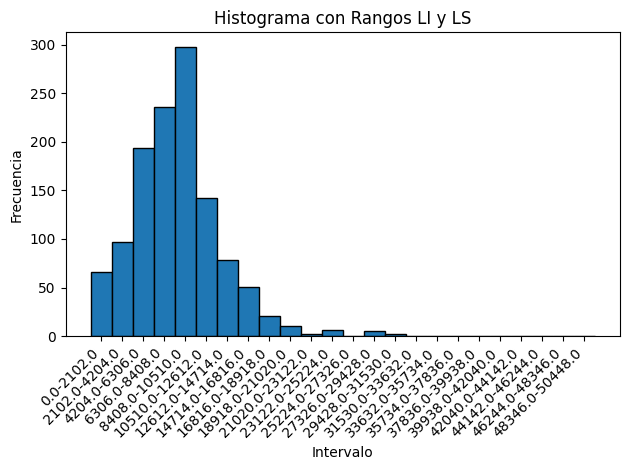

In [118]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado TablaFrecuencias con columnas LI, LS y f(i)
# Asegúrate de tener estas columnas en tu DataFrame
# TablaFrecuencias = ...

# Crear etiquetas para cada barra combinando LI y LS
etiquetas = [f'{LI}-{LS}' for LI, LS in zip(TablaFrecuencias['LI'], TablaFrecuencias['LS'])]

# Crear un histograma
plt.bar(etiquetas, TablaFrecuencias['f(i)'], width=1, edgecolor='black')

# Personalizar el gráfico
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Histograma con Rangos LI y LS')

# Rotar etiquetas para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

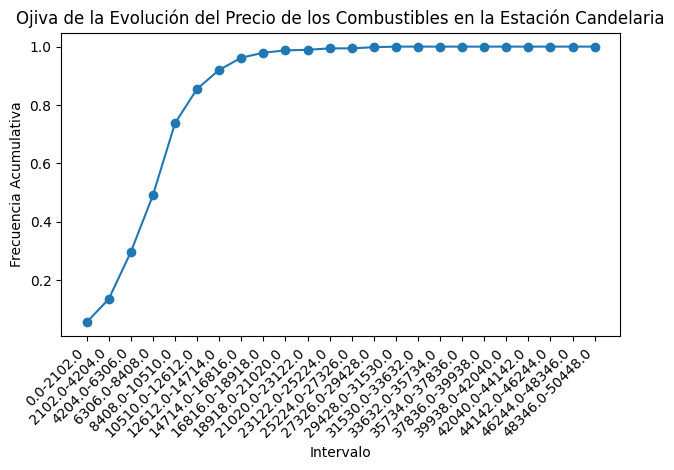

In [119]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado TablaFrecuencias con columnas LI, LS y H(i)
# Asegúrate de tener estas columnas en tu DataFrame
# TablaFrecuencias = ...

# Crear etiquetas para cada punto combinando LI y LS
etiquetas = [f'{LI}-{LS}' for LI, LS in zip(TablaFrecuencias['LI'], TablaFrecuencias['LS'])]

# Calcular la frecuencia acumulativa (H(i))
frecuencia_acumulativa = TablaFrecuencias['H(i)']

# Crear una ojiva con líneas continuas
plt.plot(etiquetas, frecuencia_acumulativa, marker='o', linestyle='-')

# Personalizar el gráfico
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia Acumulativa')
plt.title('Ojiva de la Evolución del Precio de los Combustibles en la Estación Candelaria')

# Rotar etiquetas para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [120]:
def percentiles(percentil,def_frecuenciasAcumulada,def_C,def_LI,def_LS):
    k=percentil
    n=def_frecuenciasAcumulada["F(i)"].iloc[-1]#ultimo dato de frecuencia acumuladas
    posicion=(k*n)/100
    Amplitud=def_C
    i=0
    for j in range(m):
        F=def_frecuenciasAcumulada["F(i)"][j]
        if F < posicion :
            i=j+1
    if i ==0:#Para controlar el error de cuando la posicion de f(i-1)>0 es negativa
        fi_1 = 1  
    else:
        fi_1 = def_frecuenciasAcumulada["F(i)"][i-1]
    f1=def_frecuenciasAcumulada["F(i)"][i]
    Li=int(def_LI["LI"][i])
    Ls=int(def_LS["LS"][i])
    d1=(posicion - fi_1 )
    d2=( f1 - fi_1 )
    Pk= Li + ( Amplitud *  (d1 / d2))
    print("Respuesta del metodo calcular percentil: ")
    print("posicion",posicion)
    print("i:",i)
    print("f(i):",f1)  
    print("f(i-1):",fi_1)
    print("Li:",Li)
    print("Ls:",Ls)
    print("Pk :",Pk)
    return Pk



In [121]:
Q1=percentiles(25,frecuenciasAcumulada,C,LI,LS)
mediana=percentiles(50,frecuenciasAcumulada,C,LI,LS)
Q3=percentiles(75,frecuenciasAcumulada,C,LI,LS)

IQR=Q3-Q1#rango intercuartilico
print("Rango intercuartilico :",IQR)
limiteSuperior=Q3+(1.5*(IQR))
limiteInferior=Q1-(1.5*(IQR))
print("limiteSuperior",limiteSuperior)
print("limiteInferior",limiteInferior)


Respuesta del metodo calcular percentil: 
posicion 302.0
i: 2
f(i): 357
f(i-1): 163
Li: 4204
Ls: 6306
Pk : 5710.072164948453
Respuesta del metodo calcular percentil: 
posicion 604.0
i: 4
f(i): 891
f(i-1): 593
Li: 8408
Ls: 10510
Pk : 8485.590604026846
Respuesta del metodo calcular percentil: 
posicion 906.0
i: 5
f(i): 1033
f(i-1): 891
Li: 10510
Ls: 12612
Pk : 10732.042253521127
Rango intercuartilico : 5021.970088572674
limiteSuperior 18264.99738638014
limiteInferior -1822.8829679105584


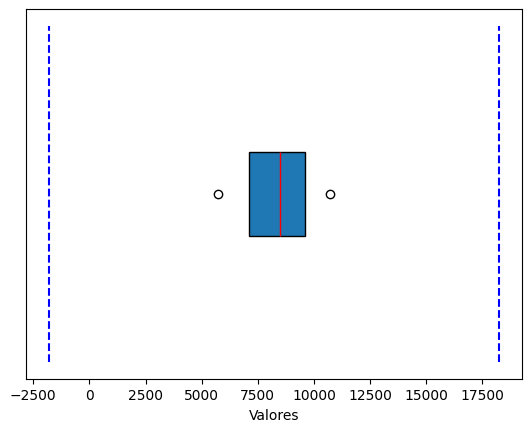

In [122]:
# Crear el diagrama de caja
plt.boxplot([Q1, mediana, Q3], vert=False, widths=0.5, positions=[0], whis=[25, 75], showcaps=False, patch_artist=True, medianprops={'color': 'red'})

# Agregar líneas adicionales para los límites superior e inferior
plt.vlines([limiteInferior, limiteSuperior], ymin=-1, ymax=1, color='blue', linestyle='dashed')

# Configurar el eje
plt.yticks([])  # Desactivar etiquetas en el eje y
plt.xlabel('Valores')

# Mostrar el diagrama de caja
plt.show()